# Metodo Sparse General


`
pip install numpy
pip install scipy
pip install cython
pip install sparsesvd
`

In [14]:
# Cargar herramientas para manejo de video
from video_tools import load_video, save_demo_video, save_video
import numpy as np
import matplotlib.pyplot as plt
#from sparsesvd import sparsesvd
%matplotlib inline

In [2]:
import time
start = time.time()
print('Started Loading Video')
D, video_size = load_video('test.avi')
print('Finished Loading Video')
print(time.time() - start)

Started Loading Video
Finished Loading Video
0.5151689052581787


In [9]:
def augmented_lagrangian(L, S, Y, mu, lamb, D):
    nuc = np.linalg.norm(L, ord='nuc')
    l1 = np.linalg.norm(S.flatten(), ord=1)
    tmp = D - L - S
    frob = np.linalg.norm(tmp, ord='fro')
    return nuc + lamb * l1 + np.sum(Y * tmp) + 0.5 * mu * frob ** 2


def J(Y, lamb):
    return max(np.linalg.norm(Y), 1/lamb * np.linalg.norm(Y))


def soft_threshold(X, eps):
    out = np.zeros(X.shape)
    out[X > eps] = X[X > eps] - eps
    out[X < -eps] = X[X < -eps] + eps
    return out


def video_segmentation(D, max_iter=500, mu_0=0.001, lamb=0.01):
    #Y_k = D / J(D, lamb)
    Y_k = D.copy().astype('float64')
    #S_k = D - Y_k
    S_k = np.zeros(D.shape)

    err = [] 
    for i in range(1, max_iter):
        mu_k = mu_0 * i  # mu_i crece de forma lineal

        print("Iteracion {}".format(i))
        # Resolver L_{k+1} = argmin_L L(L, S_k, Y_k, mu_k)
        print("Starting SVD")
        U, S, V = np.linalg.svd(D - S_k + (1 / mu_k) * Y_k, full_matrices=False)
        print("Applying Soft-threshold")
        S_shrink = soft_threshold(S, (1 / mu_k))
        L_k = np.dot(U * S_shrink, V)

        # Resolver S_{k+1} = argmin_S L(L_k, S, Y_k, mu_k)
        S_k = soft_threshold(D - L_k + (1 / mu_k) * Y_k , lamb / mu_k)
        
        print("Updating Y_k")
        # Paso en valor del dual
        Y_k += mu_k * (D - L_k - S_k)
        print(augmented_lagrangian(L=L_k, S=S_k, lamb=lamb, mu=mu_k, Y=Y_k, D=D))

        err.append(np.linalg.norm(D - L_k - S_k, ord='fro') / np.linalg.norm(D, ord='fro'))
        if err[-1] < 1e-7:
            print('Method converged in iteration {}'.format(i))
            break


    L = L_k.copy()
    S = S_k.copy()
    
    return L, S, err

In [10]:
import time
start = time.time()
print('Started video segmentation')
L, S, err = video_segmentation(D, max_iter=1000, mu_0=.001, lamb=0.01)
print('Finished video segmentation')
print(time.time() - start)

Started video segmentation
Iteracion 1
Starting SVD
Applying Soft-threshold
Updating Y_k
1.28506711445e+12
Iteracion 2
Starting SVD
Applying Soft-threshold
Updating Y_k
104404.798069
Iteracion 3
Starting SVD
Applying Soft-threshold
Updating Y_k
99451.994033
Iteracion 4
Starting SVD
Applying Soft-threshold
Updating Y_k
97245.8616789
Iteracion 5
Starting SVD
Applying Soft-threshold
Updating Y_k
95518.124612
Iteracion 6
Starting SVD
Applying Soft-threshold
Updating Y_k
94155.0086686
Iteracion 7
Starting SVD
Applying Soft-threshold
Updating Y_k
92998.5784394
Iteracion 8
Starting SVD
Applying Soft-threshold
Updating Y_k
92010.3150959
Iteracion 9
Starting SVD
Applying Soft-threshold
Updating Y_k
91156.9919244
Iteracion 10
Starting SVD
Applying Soft-threshold
Updating Y_k
90400.2373168
Iteracion 11
Starting SVD
Applying Soft-threshold
Updating Y_k
89720.4579707
Iteracion 12
Starting SVD
Applying Soft-threshold
Updating Y_k
89118.6981211
Iteracion 13
Starting SVD
Applying Soft-threshold
Updati

75564.8165325
Iteracion 108
Starting SVD
Applying Soft-threshold
Updating Y_k
75513.1713216
Iteracion 109
Starting SVD
Applying Soft-threshold
Updating Y_k
75462.0587762
Iteracion 110
Starting SVD
Applying Soft-threshold
Updating Y_k
75411.4630397
Iteracion 111
Starting SVD
Applying Soft-threshold
Updating Y_k
75361.3680396
Iteracion 112
Starting SVD
Applying Soft-threshold
Updating Y_k
75311.7573254
Iteracion 113
Starting SVD
Applying Soft-threshold
Updating Y_k
75262.6180849
Iteracion 114
Starting SVD
Applying Soft-threshold
Updating Y_k
75213.9452127
Iteracion 115
Starting SVD
Applying Soft-threshold
Updating Y_k
75165.7287519
Iteracion 116
Starting SVD
Applying Soft-threshold
Updating Y_k
75117.9633928
Iteracion 117
Starting SVD
Applying Soft-threshold
Updating Y_k
75070.6349424
Iteracion 118
Starting SVD
Applying Soft-threshold
Updating Y_k
75023.7353556
Iteracion 119
Starting SVD
Applying Soft-threshold
Updating Y_k
74977.2618436
Iteracion 120
Starting SVD
Applying Soft-threshold

71849.6822098
Iteracion 214
Starting SVD
Applying Soft-threshold
Updating Y_k
71825.0915976
Iteracion 215
Starting SVD
Applying Soft-threshold
Updating Y_k
71800.623847
Iteracion 216
Starting SVD
Applying Soft-threshold
Updating Y_k
71776.2766221
Iteracion 217
Starting SVD
Applying Soft-threshold
Updating Y_k
71752.0487901
Iteracion 218
Starting SVD
Applying Soft-threshold
Updating Y_k
71727.9405358
Iteracion 219
Starting SVD
Applying Soft-threshold
Updating Y_k
71703.9513348
Iteracion 220
Starting SVD
Applying Soft-threshold
Updating Y_k
71680.0797421
Iteracion 221
Starting SVD
Applying Soft-threshold
Updating Y_k
71656.3237893
Iteracion 222
Starting SVD
Applying Soft-threshold
Updating Y_k
71632.6821563
Iteracion 223
Starting SVD
Applying Soft-threshold
Updating Y_k
71609.1546541
Iteracion 224
Starting SVD
Applying Soft-threshold
Updating Y_k
71585.7420002
Iteracion 225
Starting SVD
Applying Soft-threshold
Updating Y_k
71562.4445613
Iteracion 226
Starting SVD
Applying Soft-threshold


69761.796634
Iteracion 320
Starting SVD
Applying Soft-threshold
Updating Y_k
69745.8570004
Iteracion 321
Starting SVD
Applying Soft-threshold
Updating Y_k
69729.9701876
Iteracion 322
Starting SVD
Applying Soft-threshold
Updating Y_k
69714.1357374
Iteracion 323
Starting SVD
Applying Soft-threshold
Updating Y_k
69698.3531427
Iteracion 324
Starting SVD
Applying Soft-threshold
Updating Y_k
69682.6223167
Iteracion 325
Starting SVD
Applying Soft-threshold
Updating Y_k
69666.9432308
Iteracion 326
Starting SVD
Applying Soft-threshold
Updating Y_k
69651.3157182
Iteracion 327
Starting SVD
Applying Soft-threshold
Updating Y_k
69635.739473
Iteracion 328
Starting SVD
Applying Soft-threshold
Updating Y_k
69620.2143053
Iteracion 329
Starting SVD
Applying Soft-threshold
Updating Y_k
69604.7396905
Iteracion 330
Starting SVD
Applying Soft-threshold
Updating Y_k
69589.3149713
Iteracion 331
Starting SVD
Applying Soft-threshold
Updating Y_k
69573.9401291
Iteracion 332
Starting SVD
Applying Soft-threshold
U

68316.2511736
Iteracion 426
Starting SVD
Applying Soft-threshold
Updating Y_k
68304.5409174
Iteracion 427
Starting SVD
Applying Soft-threshold
Updating Y_k
68292.8599931
Iteracion 428
Starting SVD
Applying Soft-threshold
Updating Y_k
68281.2081698
Iteracion 429
Starting SVD
Applying Soft-threshold
Updating Y_k
68269.5853202
Iteracion 430
Starting SVD
Applying Soft-threshold
Updating Y_k
68257.9914084
Iteracion 431
Starting SVD
Applying Soft-threshold
Updating Y_k
68246.4264954
Iteracion 432
Starting SVD
Applying Soft-threshold
Updating Y_k
68234.8906271
Iteracion 433
Starting SVD
Applying Soft-threshold
Updating Y_k
68223.3840626
Iteracion 434
Starting SVD
Applying Soft-threshold
Updating Y_k
68211.9060556
Iteracion 435
Starting SVD
Applying Soft-threshold
Updating Y_k
68200.4565246
Iteracion 436
Starting SVD
Applying Soft-threshold
Updating Y_k
68189.0356206
Iteracion 437
Starting SVD
Applying Soft-threshold
Updating Y_k
68177.6433879
Iteracion 438
Starting SVD
Applying Soft-threshold

# Plot error

El criterio de convergencia del Liu no aplica porque la igualdad $L+S=D$ se cumple desde muy temprano en el algoritmo

Text(0.5,1,'Error relativo en norma Frobenius (Liu)')

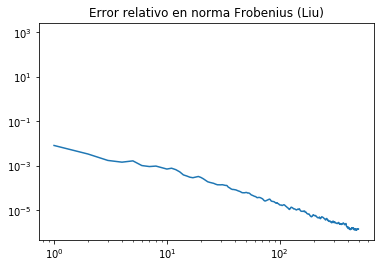

In [11]:
plt.loglog(err)
plt.title('Error relativo en norma Frobenius (Liu)')

# Ejemplos de frames del resultado

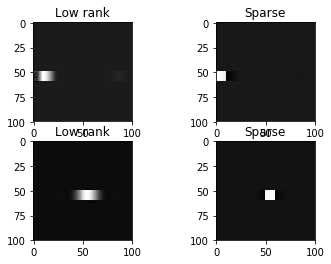

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot('221')
plt.title('Low rank')
plt.imshow(L[:, 0].reshape(100,100), cmap='gray')

plt.subplot('222')
plt.title('Sparse')
plt.imshow(S[:, 0].reshape(100,100), cmap='gray')

plt.subplot('223')
plt.title('Low rank')
plt.imshow(L[:, 50].reshape(100,100), cmap='gray')

plt.subplot('224')
plt.title('Sparse')
plt.imshow(S[:, 50].reshape(100,100), cmap='gray')

# Save Video

In [15]:
import cv2
import numpy as np

save_video('test_output.avi', video_size, D, L, S)

Creating Video
Releasing Video
